In [1]:
%pylab inline
import warnings
import numpy as np
import matplotlib.pyplot as plt

import rayopt as ro

# ignore matplotlib and numpy warning each other
warnings.simplefilter("ignore", FutureWarning)
# ignore floating point exceptions
np.seterr(divide="ignore", invalid="ignore")
# by default only print 4 significant digits
np.set_printoptions(precision=4)

Populating the interactive namespace from numpy and matplotlib


In [6]:
# It appears that rayopt requires distance rather than
# thickness quoted in patent literature
# So we have to move the thickness value one row down
# 
# The first surface represents the Object (O)
# The last surface represents the Image (I)


description = "Nikkor-Z-35mmf1.8-JP2019090947A"
columns = "type distance roc diameter material"

# Following is original data
# from patent with one correction of distance
# The data is scaled because the focal length as per the
# patent is only 1.57 mm.

text = """
O 20      0        3.0     AIR
S 0.5     4.6232   1.664   1.51680/64.13
S 0.102   0.8784   1.346   AIR
S 0.354   4.0730   1.314   1.95375/32.33
S 0.258  -2.0290   1.28    1.60342/38.03
S 0.083   3.2358   1.138   AIR
S 0.2595 -1.2945   1.096   1.68893/31.16
S 0.172   1.7517   1.262   1.85150/40.78
S 0.329  -1.7517   1.29    AIR
S 0.018   1.1917   1.306   1.49700/81.61
S 0.368  -3.5528   1.262   AIR
S 0.009   4.1556   1.174   1.83441/37.28
S 0.057   1.9836   1.114   AIR
A 0.187   0        1.066   AIR
S 0.514  -0.9917   0.956   1.61293/36.94
S 0.062  -5.7790   0.99    AIR
S 0.012   2.1244   1.088   1.59282/68.62
S 0.282  -1.3918   1.124   AIR
S 0.209  -8.4171   1.198   1.69350/53.20
S 0.098  -2.8176   1.228   AIR
S 0.229  -1.8973   1.29    1.58313/59.46
S 0.083  -6.9348   1.408   AIR
S 0.751   0        2.4     1.51680/64.13
S 0.074   0        2.4     AIR
I 0.0425  0        2.0     AIR
"""

# Following data is scaled by a factor of 21.6
# to get to an image radius of 43.2

text = """
O       432     0               64.8       AIR
S       10.8    99.86112        35.9424    1.51680/64.13
S       2.2032  18.97344        29.0736    AIR
S       7.6464  87.9768         28.3824    1.95375/32.33
S       5.5728  -43.8264        27.648     1.60342/38.03
S       1.7928  69.89328        24.5808    AIR
S       5.6052  -27.9612        23.6736    1.68893/31.16
S       3.7152  37.83672        27.2592    1.85150/40.78
S       7.1064  -37.83672       27.864     AIR
S       0.3888  25.74072        28.2096    1.49700/81.61
S       7.9488  -76.74048       27.2592    AIR
S       0.1944  89.76096        25.3584    1.83441/37.28
S       1.2312  42.84576        24.0624    AIR
A       4.0392  0               23.0256    AIR
S       11.1024 -21.42072       20.6496    1.61293/36.94
S       1.3392  -124.8264       21.384     AIR
S       0.2592  45.88704        23.5008    1.59282/68.62
S       6.0912  -30.06288       24.2784    AIR
S       4.5144  -181.80936      25.8768    1.69350/53.20
S       2.1168  -60.86016       26.5248    AIR
S       4.9464  -40.98168       27.864     1.58313/59.46
S       1.7928  -149.79168      30.4128    AIR
S       16.2216 0               51.84      1.51680/64.13
S       1.5984  0               51.84      AIR
I       0.918   0               43.2       AIR
"""

In [7]:
s = ro.system_from_text(text, columns.split(),
    description=description)
s.object.angle = np.deg2rad(32.5)
s.fields = 0, .7, 1.
#s.wavelengths = [587.5618e-9]

# following are the original aspheric coeffcients

s[11].conic     = -4.9288
s[11].aspherics = [0, -9.582E-02, 5.043E-01, -4.618E-01]
s[12].conic     = -0.4693
s[12].aspherics = [0, -8.355E-02, 5.689E-01, -2.913E-01]
s[18].conic     = 15.3255
s[18].aspherics = [0, -2.063E-01, 6.890E-02]
s[19].conic     = -0.9347
s[19].aspherics = [0, -2.416E-03, 1.158E-01, 1.983E-01, -1.130E-01]
s[20].conic     = -0.1889
s[20].aspherics = [0, -1.143E-01, -1.549E-01]
s[21].conic     = 0
s[21].aspherics = [0, -9.359E-02, -1.873E-01, 1.909E-01, -1.298E-01]

# Following is scaling done by hand in the same way that
# rayopt does it 

scale = 21.6
s[11].aspherics = [ai/(scale**(2*i + 1)) for i, ai in enumerate(s[11].aspherics)]
s[12].aspherics = [ai/(scale**(2*i + 1)) for i, ai in enumerate(s[12].aspherics)]
s[18].aspherics = [ai/(scale**(2*i + 1)) for i, ai in enumerate(s[18].aspherics)]
s[19].aspherics = [ai/(scale**(2*i + 1)) for i, ai in enumerate(s[19].aspherics)]
s[20].aspherics = [ai/(scale**(2*i + 1)) for i, ai in enumerate(s[20].aspherics)]
s[21].aspherics = [ai/(scale**(2*i + 1)) for i, ai in enumerate(s[21].aspherics)]

print(s[11].aspherics)
print(s[12].aspherics)
print(s[18].aspherics)
print(s[19].aspherics)
print(s[20].aspherics)
print(s[21].aspherics)

[0.0, -9.508125666819081e-06, 1.07255658207538e-07, -2.105123941656667e-10]
[0.0, -8.290585467154395e-06, 1.2099493149765686e-07, -1.327896501092653e-10]
[0.0, -2.0470948915307623e-05, 1.4653806961132993e-08]
[0.0, -2.3973733678809123e-07, 2.4628604442658933e-08, 9.039542607850089e-11, -1.1040651032393528e-13]
[0.0, -1.1341878143575673e-05, -3.2944480381415106e-08]
[0.0, -9.286844929634708e-06, -3.983538525138185e-08, 8.702212223089167e-11, -1.2682092955793626e-13]


In [8]:
s.update()
print(s)

System: Nikkor-Z-35mmf1.8-JP2019090947A
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 32.5 deg
 Pupil:
   Pupil Distance: 34.9212
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 9.60801
Image:
 Radius: 21.6
 Update Radius: True
 Pupil:
   Pupil Distance: -48.0172
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 13.583
Stop: 13
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S        432        inf       64.8         basic/air   1.000   1.000   89.30
 1 S       10.8      99.86     35.942                 -   1.517   1.517   64.13
 2 S     2.2032      18.97     29.074         basic/air   1.000   1.000   89.30
 3 S     7.6464      87.98     28.382                 -   1.954   1.954   32.33
 4 S     5.5728     -43.83     27.648                 -   1.603   1.603   38.03
 5 S     1.7928      69.89     24.581         basic/air   1.000   1.000   89.30
 6 S     5.6052     -27.96     23.6

System: Nikkor-Z-35mmf1.8-JP2019090947A
Scale: 1.0 mm
Wavelengths: 588, 656, 486 nm
Fields: 0, 0.7, 1
Object:
 Semi-Angle: 32.5 deg
 Pupil:
   Pupil Distance: 34.9212
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 9.60801
Image:
 Radius: 21.6
 Update Radius: True
 Pupil:
   Pupil Distance: -48.0172
   Refractive Index: 1.00028
   Update Radius: True
   Radius: 13.583
Stop: 13
Elements:
 # T   Distance   Rad Curv   Diameter          Material       n      nd      Vd
 0 S        432        inf       64.8         basic/air   1.000   1.000   89.30
 1 S       10.8      99.86     35.942                 -   1.517   1.517   64.13
 2 S     2.2032      18.97     29.074         basic/air   1.000   1.000   89.30
 3 S     7.6464      87.98     28.382                 -   1.954   1.954   32.33
 4 S     5.5728     -43.83     27.648                 -   1.603   1.603   38.03
 5 S     1.7928      69.89     24.581         basic/air   1.000   1.000   89.30
 6 S     5.6052     -27.96     23.6

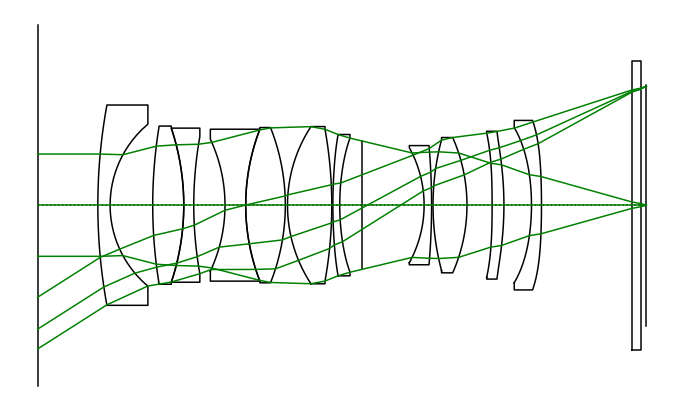

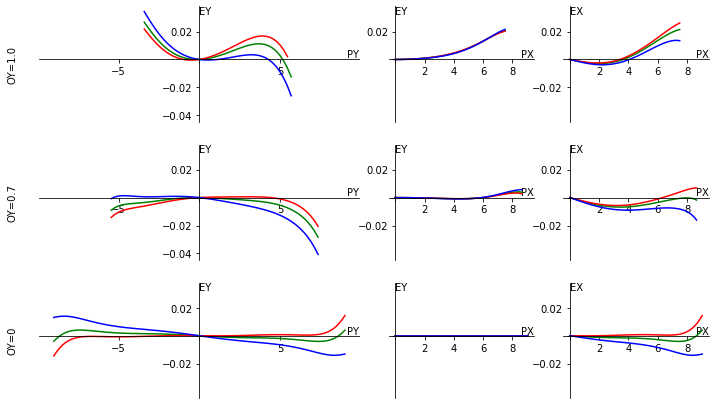

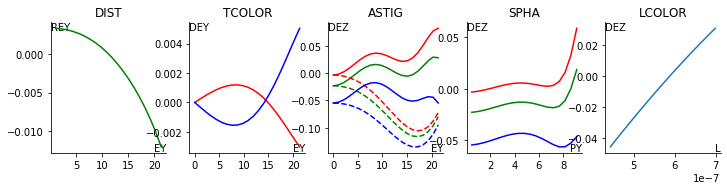

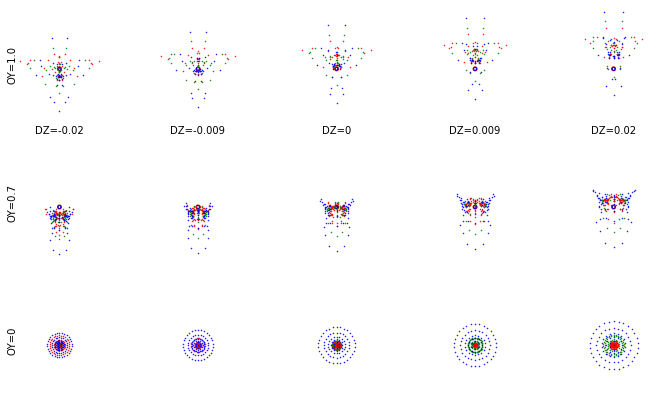

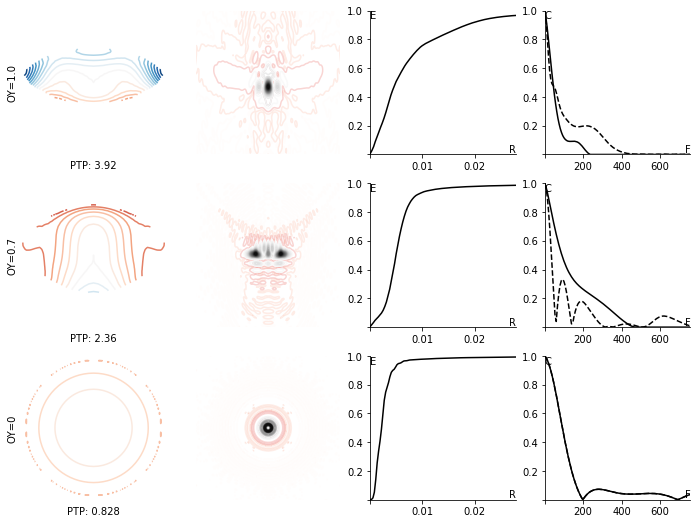

In [9]:
ro.Analysis(s)